[View in Colaboratory](https://colab.research.google.com/github/VAgni/Demo/blob/master/StockTensor.ipynb)

IMPORTING THE NECESSARY LIBRARIES

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

IMPORTING THE GIVEN DATASET IN GOOGLE COLAB

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data1.csv to data1.csv
User uploaded file "data1.csv" with length 1273224 bytes


READING AND CLEANING THE DATASET

In [0]:
data = pd.read_csv('data1.csv')
data = data.drop(['DATE'], 1)
n = data.shape[0]
p = data.shape[1]
data = data.values

TRAINING THE DATASET

In [0]:
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

FEATURE SCALING

In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

SPLITTING THE DATASET

In [0]:
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]
n_stocks = X_train.shape[1]

Model architecture parameters

In [0]:
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

PLACEHOLDERS AND INITIALIZERS

In [24]:
net = tf.InteractiveSession()
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Variables for hidden weights and biases

In [0]:
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

DESIGNING THE NETWORK ARCHITECTURE

In [0]:
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))


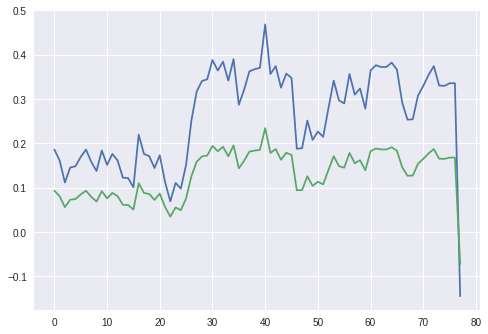

In [18]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# Init
net.run(tf.global_variables_initializer())

# Setup plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()

FITTING THE NEURAL NETWORK

In [0]:
batch_size = 256
mse_train = []
mse_test = []

MSE Train:  0.750321
MSE Test:  0.018536953


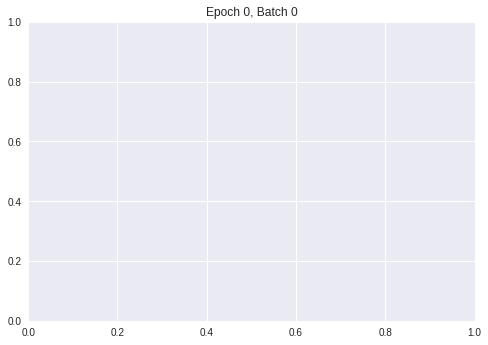

MSE Train:  0.99883
MSE Test:  0.65552276


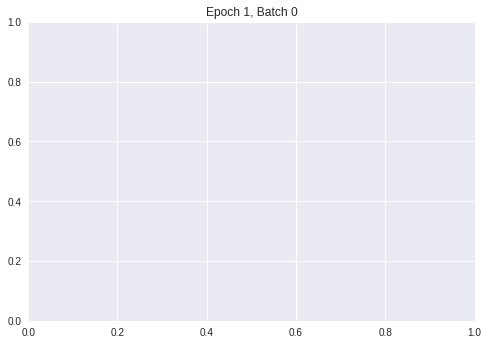

MSE Train:  0.10164123
MSE Test:  0.012789245


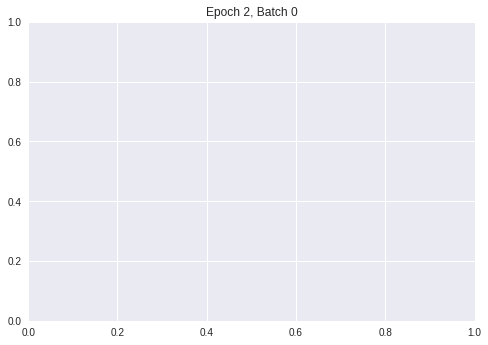

MSE Train:  0.09706117
MSE Test:  0.14993277


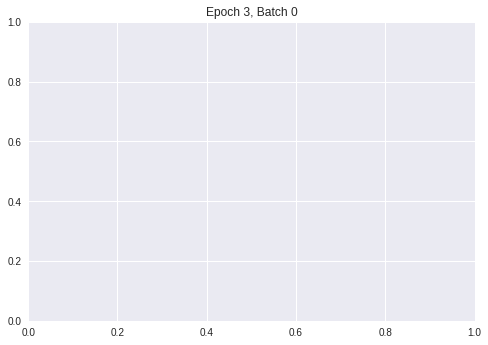

MSE Train:  0.0705569
MSE Test:  0.13694997


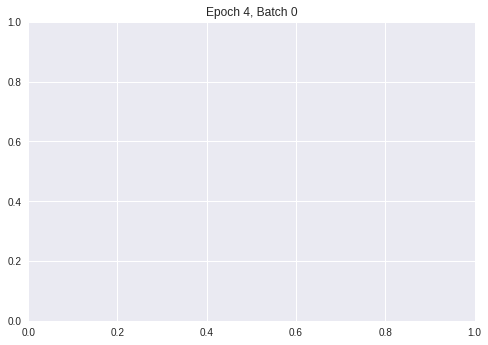

MSE Train:  0.03900892
MSE Test:  0.031932957


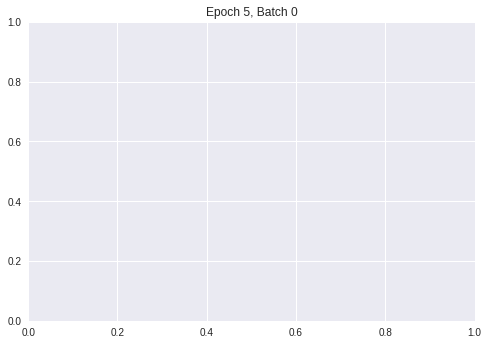

MSE Train:  0.032254703
MSE Test:  0.02178965


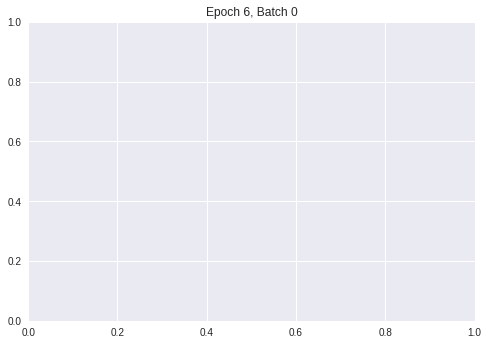

MSE Train:  0.021606918
MSE Test:  0.038080856


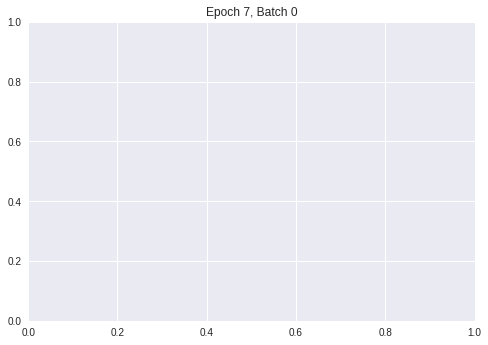

MSE Train:  0.034415036
MSE Test:  0.04729137


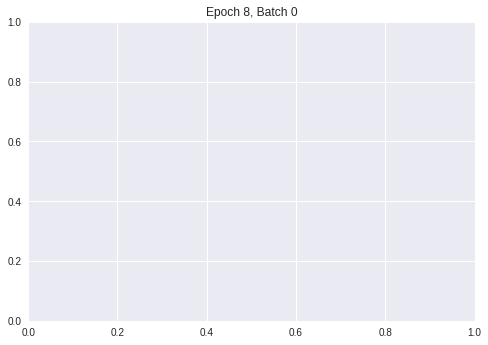

MSE Train:  0.011619067
MSE Test:  0.025607381


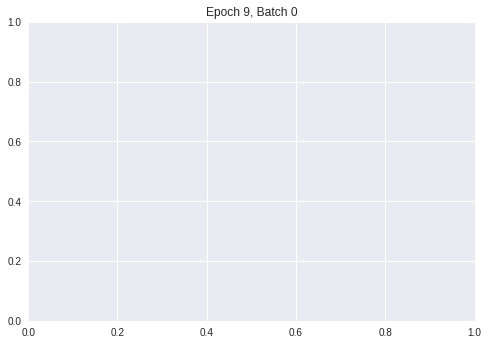

In [20]:
epochs = 10
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 50) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.pause(0.01)


In [21]:
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)

0.025607381
